### Student Information
Name: Charkkri Limbud

Student ID: 109065429

GitHub ID: https://github.com/charkkri

Kaggle name:   **Jacky Lim** (Team name: Jacky)   https://www.kaggle.com/charkkri   

Kaggle private scoreboard snapshot:

![Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

---


# Table of Content

## Part 1 - Take home exercise
- Load Data
- Exercise 1
- Exercise 2
- Exercise 3
- Exercise 4
- Exercise 5
- Exercise 6
- Exercise 7
- Exercise 8

## Part 3 - Kaggle Report
- Data Preparation
    - Load Data
    - Save Data
    - Exploratory Data Analysis (EDA)
- Model 1 - Naive Bayes Classification using BOW
- Model 2 - Naive Bayes Classification using TF-IDF
- Model 3 - Deep Learning
- Model 4 - BERT (Bidirectional Encoder Representations from Transformers)
- Conclusion


---

# Part 1 - Take home exercise

## Load data
below cells in this section are copied from [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master)

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
#  Exercise 1  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

### Train dataset
We will start with **train dataset** and follow below steps  
- check missing value
- check duplicate data
- create term-document matrix
- count frequency and sort them
- plot top 30 word frequencies

In [6]:
train_df.head()

,id,text,emotion,intensity
2920,40093,. @KotakBankLtd @udaykotak official got in tou...,sadness,0.729
2394,30390,I aspire to have Val's self confidence and opt...,joy,0.500
504,10504,Checked-in for my flight to Toronto. Took seat...,anger,0.458
3385,40558,I'm too sober time to get shit faced,sadness,0.360
2151,30147,@Norn_IronMaiden @forest_fr1ends It's hilarious,joy,0.694


In [7]:
# check missing value

train_df.isnull().sum()

id           0
text         0
emotion      0
intensity    0
dtype: int64

In [8]:
# check duplicate

train_df.duplicated().sum()

0

There is no missing value and no duplicate. So we can proceed to further steps

In [9]:
#create term-document matrix with max_features=30

from sklearn.feature_extraction.text import CountVectorizer

count_vect_train30 = CountVectorizer(max_features=30)
train_matrix30 = count_vect_train30.fit_transform(train_df.text)

Since `max_features` parameter will build a vocabulary that only consider the top specified number and ordered by term frequency across the corpus, so we can specify  `max_features=30` to get word frequency for Top 30 words.

In [10]:
# see the shape of the term-document matrix

train_matrix30.shape

(3613, 30)

In [11]:
# count the frequency of the terms

train_term_freq30 = []
for j in range(0,train_matrix30.shape[1]):
    train_term_freq30.append(sum(train_matrix30[:,j].toarray()))
train_term_freq30 = np.asarray(train_matrix30.sum(axis=0))[0]

In [12]:
# get feature names

train_term30 = count_vect_train30.get_feature_names()

In [13]:
# Sort data

data_train30 = pd.Series(data=train_term_freq30, index=train_term30)
sort_train30 = data_train30.sort_values(ascending=False)

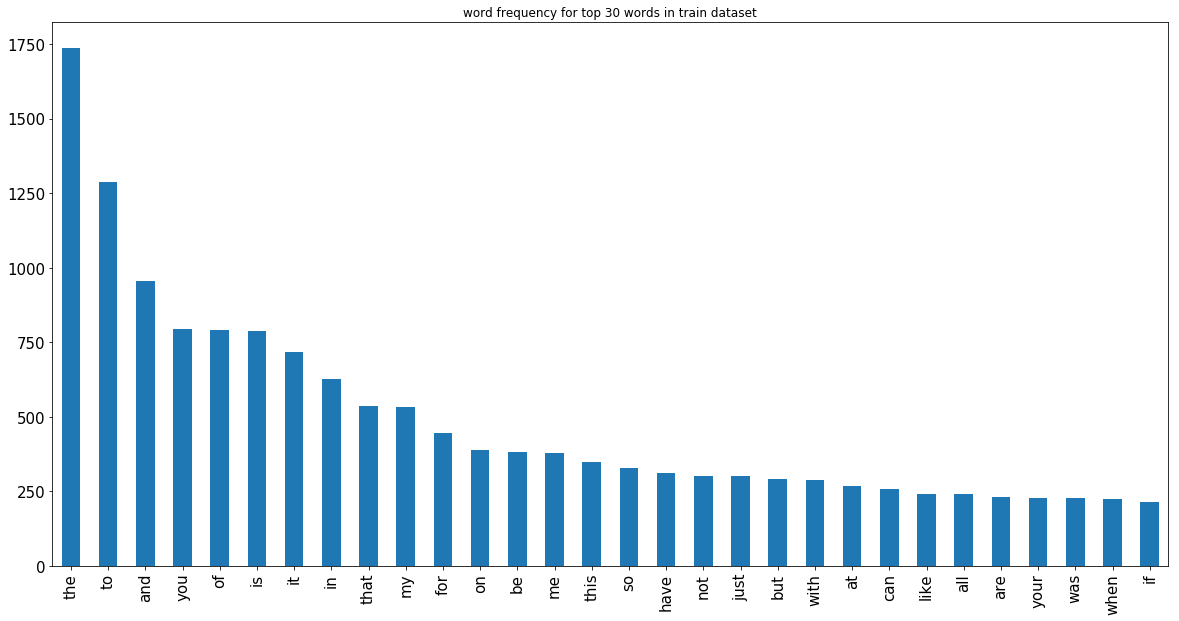

In [14]:
# Plot word frequency for top 30 words in train dataset
import matplotlib.pyplot as plt

sort_train30.plot(kind='bar', figsize=(20,10),
                 title='word frequency for top 30 words in train dataset', fontsize=15)
plt.show()

### Test dataset
Apply the same steps with **test dataset**

In [15]:
# check missing value

test_df.isnull().sum()

id           0
text         0
emotion      0
intensity    0
dtype: int64

In [16]:
# check duplicate

test_df.duplicated().sum()

0

There is no missing value and no duplicate. So we can proceed to further steps

In [17]:
#create term-document matrix with max_features=30

count_vect_test30 = CountVectorizer(max_features=30)
test_matrix30 = count_vect_test30.fit_transform(test_df.text)

In [18]:
# see the shape of the term-document matrix

test_matrix30.shape

(347, 30)

In [19]:
# count the frequency of the terms

test_term_freq30 = []
for j in range(0,test_matrix30.shape[1]):
    test_term_freq30.append(sum(test_matrix30[:,j].toarray()))
test_term_freq30 = np.asarray(test_matrix30.sum(axis=0))[0]

In [20]:
# get feature names

test_term30 = count_vect_test30.get_feature_names()

In [21]:
# Sort data

data_test30 = pd.Series(data=test_term_freq30, index=test_term30)
sort_test30 = data_test30.sort_values(ascending=False)

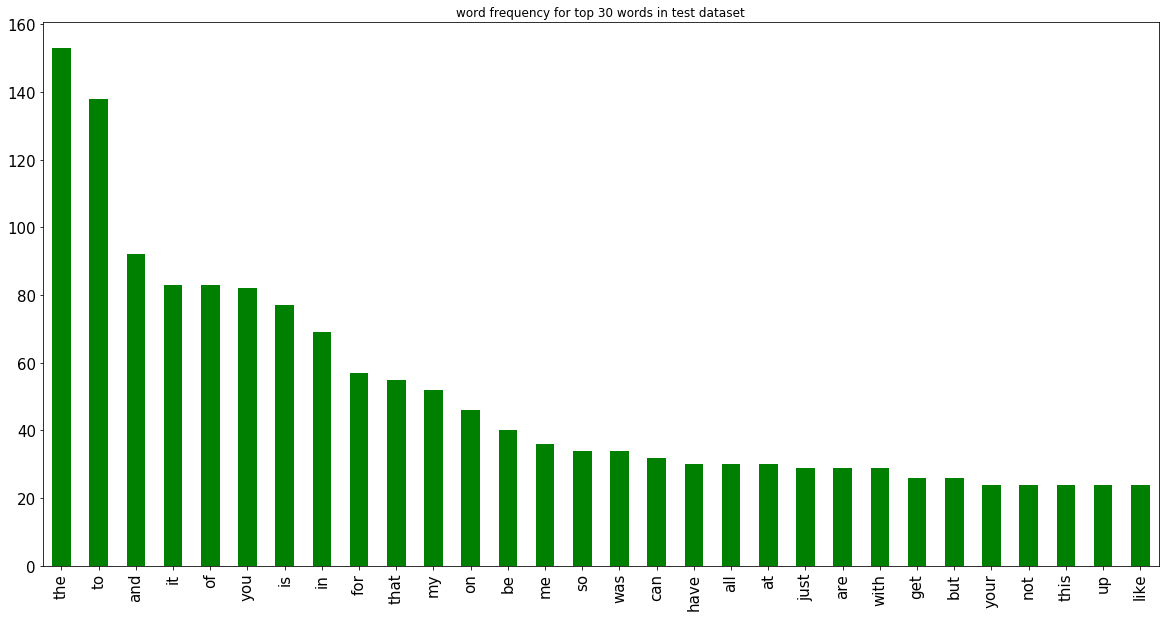

In [22]:
# Plot word frequency for top 30 words in train dataset

sort_test30.plot(kind='bar', figsize=(20,10), color = 'g',
                 title='word frequency for top 30 words in test dataset', fontsize=15)
plt.show()

From above two plots, we can see that most of the words are preposition, article, pronoun which seems very general and no much meaningful since they occured very often in the text. So next we will use `stop words` to exclude some terms and see whether there is any difference in the list of word frequency for top 30 words.

### Train dataset using `stop words`

In [23]:
#create term-document matrix with max_features=30 and using stop words

count_vect_train30 = CountVectorizer(max_features=30, stop_words='english')
train_matrix30 = count_vect_train30.fit_transform(train_df.text)

In [24]:
# count the frequency of the terms

train_term_freq30 = []
for j in range(0,train_matrix30.shape[1]):
    train_term_freq30.append(sum(train_matrix30[:,j].toarray()))
train_term_freq30 = np.asarray(train_matrix30.sum(axis=0))[0]

In [25]:
# get feature names

train_term30 = count_vect_train30.get_feature_names()

In [26]:
# Sort data

data_train30 = pd.Series(data=train_term_freq30, index=train_term30)
sort_train30 = data_train30.sort_values(ascending=False)

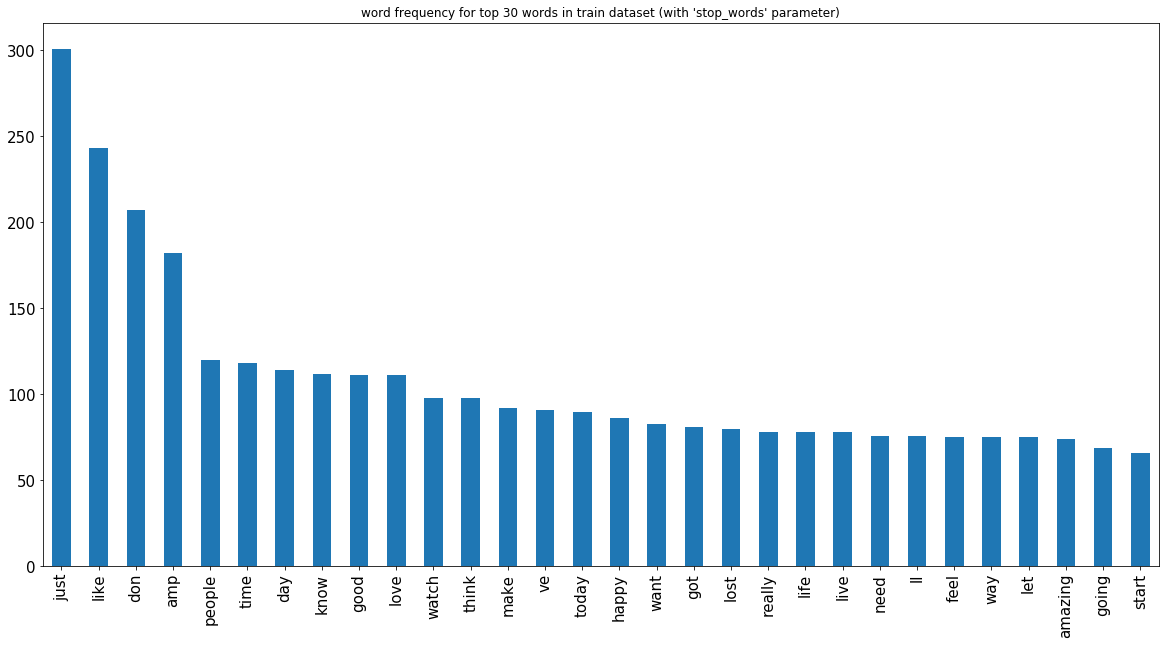

In [27]:
# Plot word frequency for top 30 words in train dataset

sort_train30.plot(kind='bar', figsize=(20,10),
                 title='word frequency for top 30 words in train dataset (with \'stop_words\' parameter)', fontsize=15)
plt.show()

### Test dataset using `stop words`

In [28]:
#create term-document matrix with max_features=30

count_vect_test30 = CountVectorizer(max_features=30, stop_words='english')
test_matrix30 = count_vect_test30.fit_transform(test_df.text)

In [29]:
# count the frequency of the terms

test_term_freq30 = []
for j in range(0,test_matrix30.shape[1]):
    test_term_freq30.append(sum(test_matrix30[:,j].toarray()))
test_term_freq30 = np.asarray(test_matrix30.sum(axis=0))[0]

In [30]:
# get feature names

test_term30 = count_vect_test30.get_feature_names()

In [31]:
# Sort data

data_test30 = pd.Series(data=test_term_freq30, index=test_term30)
sort_test30 = data_test30.sort_values(ascending=False)

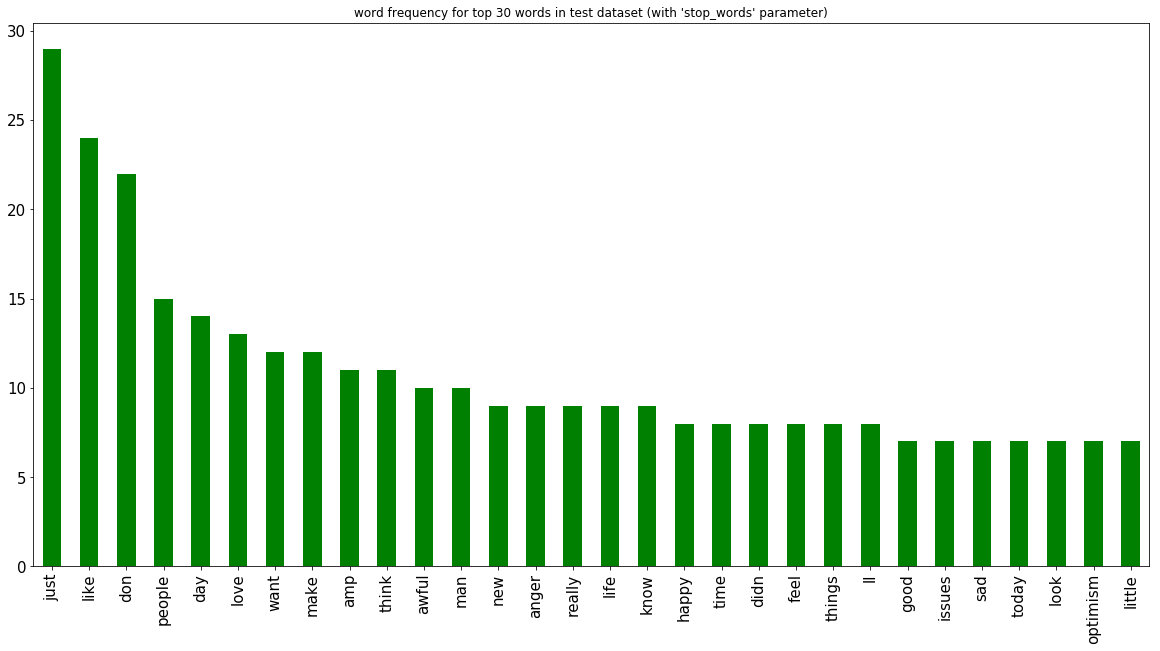

In [32]:
# Plot word frequency for top 30 words in train dataset

sort_test30.plot(kind='bar', figsize=(20,10), color = 'g',
                 title='word frequency for top 30 words in test dataset (with \'stop_words\' parameter)', fontsize=15)
plt.show()

After using `stop_words` parameter with both dataset, we can see that some general words (eg. the, to, and, is etc.) are dropped from the list.

---
# Exercise 2   
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [33]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer

# set max_features = 1000 and use nltk tokenizer
idf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# Learn vocabulary and idf, and return document-term matrix
train_idf_1000 = idf_1000.fit_transform(train_df['text'])

## check dimension
train_idf_1000.shape

(3613, 1000)

In [34]:
# get feature names and show the feature names for features [100:110]

feature_names_1000 = idf_1000.get_feature_names()
feature_names_1000[100:110]

['awesome', 'awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc']

**Thus, the feature names for features [100:110] are displayed below.**

['away', 'awe', 'awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18']

---
# Exercise 3   
Can you interpret the results below? What do they mean?
![alt text](img/takehome_exercise3_cf.png)

The diagonal elements (from top-left to bottom-right) show that the items is correctly classified into the class their belong (we may call it is **True Positive** (TP)), for example  
- the top left element means 57 items that belong to **anger** class are correctly classified into anger class.
- the next diagonal element from top left means 72 items that belong to **fear** class are correctly classified into fear class.
- the next diagonal element means 53 items that belong to **joy** class are correctly classified into joy class.
- the bottom right element means 43 items that belong to **sadness** class are correctly classified into sadness class.

If we sum the items by column, we will get the numbers of items that belong to that colum's label (number of true label),  for example  
- there are total 94 (57 + 20 + 5 + 12) items in the first column meaning that the actual label of those 94 items is **anger** class. 
- However, only 57 of them are **correctly classified** into **anger** (True Positive), while the rest are misclassified into other classes. 
- 20 of them are **misclassified** into **fear** (or we may consider it is False Negative (FN)).
- 5 of them are **misclassified** into **joy** (False Negative).
- 12 of them are **misclassified** into **sadness** (False Negative).

If we sum the items by row, we will get the numbers of items that are classified into that row's label, for example  
- there are 84 (57 + 16 + 8 + 3) items in the first row. 
- 57 of them are classified into anger and their actual label is **anger**, so they are **correctly** classified (True Positive).
- 16 of them are classified into anger but their actual label is **fear**, so they are **misclassified** (or we may call it is False Positive).
- 8 of them are classified into anger but their actual label is **joy**, so they are **misclassified** (False Positive).
- 3 of them are classified into anger but their actual label is **sadness**, so they are **misclassified** (False Positive).

---
#  Exercise 4 
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

In [35]:
# build analyzers (bag-of-words) with 500 features
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# learn vocabulary from train data
BOW_500.fit(train_df['text'])

/home/charkkri/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7f8dc805f680>)

In [36]:
#X are from the tokenized terms of the text column 
#Y are from the emotion, it is the target lebel

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

In [37]:
# see the shape of the data

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


In [38]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

#Training
clf = clf.fit(X_train, y_train)

# predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

### check the performance of the model

In [39]:
## accuracy

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.79
testing accuracy: 0.71


In [40]:
## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.71      0.65      0.68        84
        fear       0.74      0.81      0.77       110
         joy       0.74      0.70      0.72        79
     sadness       0.65      0.65      0.65        74

    accuracy                           0.71       347
   macro avg       0.71      0.70      0.70       347
weighted avg       0.71      0.71      0.71       347



In [41]:
#plot confusion matrix

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred) 
print(cm)

[[55 13  6 10]
 [ 7 89  5  9]
 [ 9  8 55  7]
 [ 7 11  8 48]]


In [42]:
# Funciton for visualizing confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

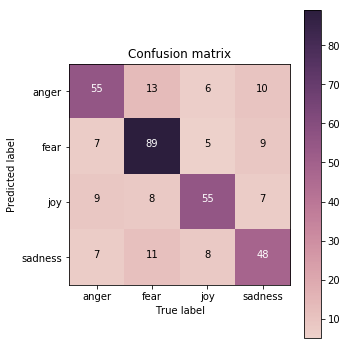

In [43]:
# plot your confusion matrix
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

### What are the testing results?
If we compare the above confusion matrix (Model with Naive Bayes)  with the one in exercise 3 (Model with Decision Tree), we can see that 
- number of True Positive (diagonal line from top-left to bottom-right) of Model with Naive Bayes is higher. 
- number of False Positive (horizontal line) of model with Naive Bayes is lower, result in having **higher Precision**.
- number of False Negative (vertical line) of model with Naive Bayes is lower, result in having **higher Recall**.

To easily compare the result and avoid error in computation by hand, we can see from classification report that the model with Naive Bayes has higher accuracy, precision and recall.

To conclude, we may say that the **model with Naive Bayes performs better** than the model with Decision Tree.

---
# Exercise 5

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

### Answer
I have already explained some comparison points about the results from the Naive Bayes model and the Decision Tree model in the exercise 4 above.  

As I mentioned above, model with Naive Bayes performs better than the model with Decision Tree. Professor always mention in the class that Naive Bayse usually give higher accuracy than decision tree. 

Because decision tree model will keep on building the tree to achieve the high purity, the tree can be quite large and tends to be easy to overfitting. Although it is easy and simple to build the decision tree, we have to be aware of the said problems. One method to solve the complexity of the growing tree is to do the prunning which will help improves predictive accuracy as well as the reduction of overfitting.

---
# Exercise 6 

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

### 6.1 Prepare data (X, y)

In [44]:
import keras

# standardize name (X, y) 
#X is features
#Y is target label
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']

## check dimension is a good habbit 
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)

X_train.shape:  (3613, 500)
y_train.shape:  (3613,)
X_test.shape:  (347, 500)
y_test.shape:  (347,)


### 6.2 Deal with categorical label (y)

Rather than put your label `train_df['emotion']` directly into a model, we have to process these categorical (or say nominal) label by ourselves. 

Here, we use the basic method [one-hot encoding](https://en.wikipedia.org/wiki/One-hot) to transform our categorical  labels to numerical ones.


In [45]:
## deal with label (string -> one-hot)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)
print('check label: ', label_encoder.classes_)
print('\n## Before convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\n\n## After convert')
print('y_train[0:4]:\n', y_train[0:4])
print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


check label:  ['anger' 'fear' 'joy' 'sadness']

## Before convert
y_train[0:4]:
 2920    sadness
2394        joy
504       anger
3385    sadness
Name: emotion, dtype: object

y_train.shape:  (3613,)
y_test.shape:  (347,)


## After convert
y_train[0:4]:
 [[0. 0. 0. 1.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]]

y_train.shape:  (3613, 4)
y_test.shape:  (347, 4)


### 6.3 Build model

In [46]:
# I/O check
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  4


In [47]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 260       
_________________________________________________________________
softmax (Softmax)            (None, 4)                

### 6.4 Train

In [48]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('logs/training_log.csv')  # save the generating log here

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/25
113/113 [==============================] - 0s 3ms/step - loss: 1.3174 - accuracy: 0.3786 - val_loss: 1.2667 - val_accuracy: 0.4294
Epoch 2/25
113/113 [==============================] - 0s 2ms/step - loss: 0.9659 - accuracy: 0.6560 - val_loss: 0.9202 - val_accuracy: 0.6657
Epoch 3/25
113/113 [==============================] - 0s 2ms/step - loss: 0.5730 - accuracy: 0.8046 - val_loss: 0.7590 - val_accuracy: 0.7147
Epoch 4/25
113/113 [==============================] - 0s 2ms/step - loss: 0.4149 - accuracy: 0.8503 - val_loss: 0.7934 - val_accuracy: 0.7118
Epoch 5/25
113/113 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8901 - val_loss: 0.8167 - val_accuracy: 0.7118
Epoch 6/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2650 - accuracy: 0.9073 - val_loss: 0.8625 - val_accuracy: 0.7003
Epoch 7/25
113/113 [==============================] - 0s 2ms/step - loss: 0.2213 - accuracy: 0.9319 - val_loss: 0.9409 - val_accuracy: 0.7118
Epoch 

### 6.5 Predict on testing data

In [49]:
## predict
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

array([[5.4313405e-04, 1.2053819e-01, 3.3836135e-01, 5.4055738e-01],
       [1.1440438e-04, 9.9986947e-01, 1.0460607e-08, 1.6059757e-05],
       [1.7448458e-06, 9.9999523e-01, 6.6535108e-07, 2.3408056e-06],
       [7.1696025e-01, 9.5135890e-02, 1.8561718e-01, 2.2866384e-03],
       [2.7184069e-04, 4.0874604e-04, 2.6385719e-06, 9.9931681e-01]],
      dtype=float32)

In [50]:
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

array(['sadness', 'fear', 'fear', 'anger', 'sadness'], dtype=object)

In [51]:
from sklearn.metrics import accuracy_score

print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.67


In [52]:
#Let's take a look at the training log
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
training_log

,epoch,accuracy,loss,val_accuracy,val_loss
0,0,0.378633,1.317442,0.429395,1.266737
1,1,0.655965,0.965865,0.665706,0.920158
2,2,0.804595,0.573014,0.714697,0.758983
3,3,0.850263,0.414902,0.711816,0.793398
4,4,0.890119,0.325521,0.711816,0.816698
5,5,0.907279,0.265030,0.700288,0.862479
6,6,0.931913,0.221346,0.711816,0.940850
7,7,0.937171,0.195820,0.688761,0.967371
8,8,0.955715,0.159369,0.697406,1.022938
9,9,0.959590,0.141551,0.677233,1.092181


### 6.6 Plot the Training and Validation Accuracy and Loss

In [53]:
import matplotlib.pyplot as plt
#plt.style.use('ggplot')
plt.style.use('seaborn-white')

def plot_history(history):
    acc = history['accuracy']
    val_acc = history['val_accuracy']
    loss = history['loss']
    val_loss = history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training Accuracy per epoch')
    plt.legend()
    
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss per epoch')
    plt.legend()

/home/charkkri/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py:2064: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/charkkri/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


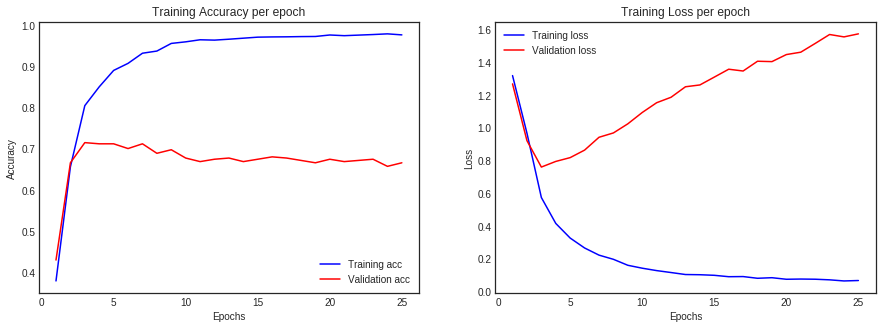

In [54]:
plot_history(training_log)

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

### Answer
Refer to the material from "Convolutional Neural Networks for Visual Recognition" of [Stanford](https://cs231n.github.io/neural-networks-3/) and documentation from [tensorflow](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit).


**For the plot of accuracy (left plot)**,  
this plot can tell us the amount of overfitting in our model. The gap between the training and validation accuracy indicates the amount of overfitting. The accuarcy of training (blue line) keeps increasing until reach 10th epoch and become a flat line, while the accuracy of the validation (red line) increase to a certain point only (i.e. until 5th epoch). Thus, the model start to overfit from about the 5th epoch.

Tensorflow documentation also mentioned that training model for too long will cause the model to start to overfit and learn patterns from the training data. So we have to adjust it to prevent this issue.

**For the plot of loss (right plot)**,  
It seems that the model has the high learning rate because the the plot show that it decays the loss very fast. Loss decreasing too fast is not the ideal learning rate because the model learn too fast and cannot settle the optimization for the model. The plot indicates that the training loss keep decreasing until very low, but the validation loss goes in the opposite direction which is the sign of overfitting.



---
# Exercise 7 

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?



### Answer
As each word we have is represented by the vector, but now we want to deal with the whole sentence from tweet text.
So we need to find the vector representation of whole text in each tweet, instead of each single word. To achieve this we can calculate **average word embeddings for each word in the tweet text.**

In [55]:
# Prepare training corpus

import gensim
import nltk

## ignore warnings
import warnings
warnings.filterwarnings('ignore')

## the input type
train_df['text_tokenized'] = train_df['text'].apply(lambda x: nltk.word_tokenize(x))
train_df[['id', 'text', 'text_tokenized']].shape

(3613, 3)

In [56]:
## create the training corpus
training_corpus = train_df['text_tokenized'].values
training_corpus[:1]

array([list(['.', '@', 'KotakBankLtd', '@', 'udaykotak', 'official', 'got', 'in', 'touch', '.', 'Issue', 'not', 'addressed', '.', '#', 'unhappy', '#', 'patheticservices'])],
      dtype=object)

In [57]:
# the inout type
train_df[['id', 'text', 'text_tokenized']].head()

,id,text,text_tokenized
2920,40093,. @KotakBankLtd @udaykotak official got in tou...,"[., @, KotakBankLtd, @, udaykotak, official, g..."
2394,30390,I aspire to have Val's self confidence and opt...,"[I, aspire, to, have, Val, 's, self, confidenc..."
504,10504,Checked-in for my flight to Toronto. Took seat...,"[Checked-in, for, my, flight, to, Toronto, ., ..."
3385,40558,I'm too sober time to get shit faced,"[I, 'm, too, sober, time, to, get, shit, faced]"
2151,30147,@Norn_IronMaiden @forest_fr1ends It's hilarious,"[@, Norn_IronMaiden, @, forest_fr1ends, It, 's..."


In [58]:
# getting model

from gensim.models import Word2Vec

## setting
vector_dim = 100
window_size = 5
min_count = 1
training_iter = 20

## model
word2vec_model = Word2Vec(sentences=training_corpus, 
                          size=vector_dim, window=window_size, 
                          min_count=min_count, iter=training_iter)

In [59]:
# Get the most similar words
word = 'happy'
topn = 10
word2vec_model.most_similar(word, topn=topn)

[("'you", 0.9544256329536438),
 ('bday', 0.9347425699234009),
 ('plz', 0.9332816004753113),
 ('Be', 0.932650089263916),
 ('happier', 0.9321967959403992),
 ('kinda', 0.9321448802947998),
 ('help', 0.9319801926612854),
 ('PUSSY\\nP', 0.9227263331413269),
 ('ThankYouCGI', 0.9221750497817993),
 ('-/', 0.9207967519760132)]

In [60]:
# code modified from stackoverflow and kaggle

def make_feature_vec(words, model, vector_dim):
    """
    Average the word vectors for a set of words
    """
    feature_vec = np.zeros((vector_dim,),dtype="float32")  # pre-initialize (for speed)
    nwords = 0.
    index2word_set = set(model.wv.index2word)  # words known to the model

    for word in words:
        if word in index2word_set: 
            nwords = nwords + 1.
            feature_vec = np.add(feature_vec,model[word])
    
    feature_vec = np.divide(feature_vec, nwords)
    return feature_vec


def get_avg_feature_vecs(comments, model, vector_dim):
    """
    Calculate average feature vectors for all reviews
    """
    counter = 0
    review_feature_vecs = np.zeros((len(comments),vector_dim), dtype='float32')  # pre-initialize (for speed)
    
    for comment in comments:
        review_feature_vecs[counter] = make_feature_vec(comment, model, vector_dim)
        counter = counter + 1
    return review_feature_vecs

In [61]:
# average vectors for training text

train_text = train_df.text_tokenized.tolist()
trainVecs = get_avg_feature_vecs(train_text, word2vec_model, vector_dim)
trainVecs[0:1]

array([[ 0.42944193, -0.23131   , -0.04246686, -0.26266953, -0.37798277,
        -0.0536861 ,  0.02678989, -0.21847901,  0.6445021 , -0.14237073,
         0.44139224, -0.16279149, -0.0492458 , -0.3962525 ,  0.6200214 ,
         0.30434576,  0.71913785, -0.17041577, -0.01590744, -0.17586234,
        -0.1180267 , -0.2768837 ,  0.03475212, -0.31383556, -0.51105475,
        -0.35713947,  0.0329527 , -0.41623852, -0.00868635, -0.49496758,
        -0.5005347 , -0.23678732, -0.3325236 ,  0.434126  , -0.45922157,
         0.23803356, -0.6679135 , -0.35530558, -0.28703627, -0.5151619 ,
         0.25045606,  0.43988955, -0.58060807, -0.39961752,  0.3879001 ,
        -0.64141583, -0.20600164,  0.24567848, -0.49098927, -0.00393204,
         0.20439734, -0.2836104 ,  0.26419604, -0.05762235,  0.04961104,
         0.50922376, -0.63038635,  0.73979336,  0.20040832,  0.02875953,
        -0.25820982,  0.07711072, -0.42921284,  0.6213741 , -0.09305678,
         0.26312196, -0.5653079 ,  0.24548891,  0.3

Now our average vector for sentence is ready to use

---
# Exercise 8 

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [62]:
import gensim
from gensim.models import KeyedVectors

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

#Note: this model is very huge, this will take some time ...
model_path = "GoogleNews/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)
print('load ok')

load ok


In [63]:
word_list = ['angry', 'happy', 'sad', 'fear']

#select the word itself plus top 14 most similar words
topn = 14
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('angry_words: ', angry_words)
print('happy_words: ', happy_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

# Join them together and set as target word
target_words = angry_words + happy_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

#assign color to each type, eg. first 15 use blue
print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['m'] * cn
print(color)

angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier']
happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried']

target words: 
['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'happy', 'glad', 'plea

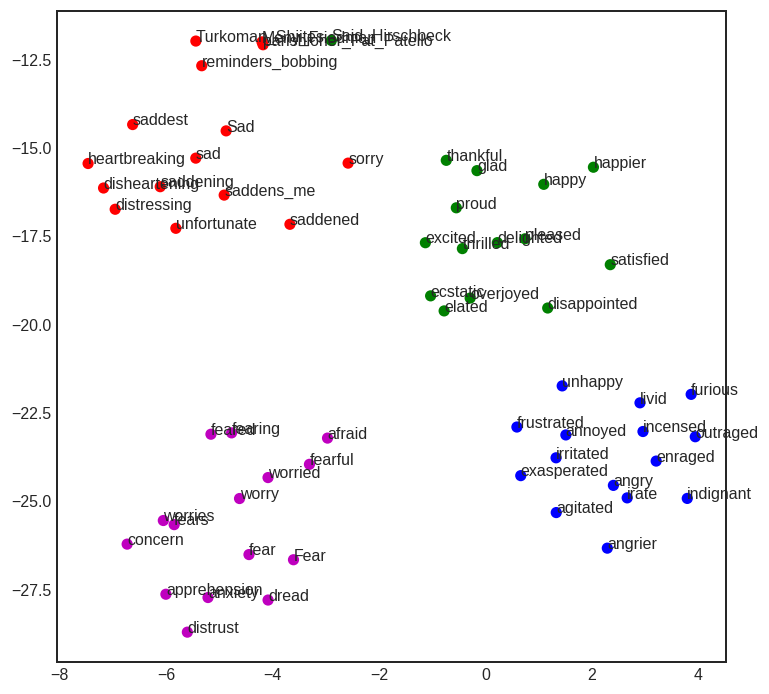

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

---

---

# Part 3 - Kaggle Report

This part is worth 30% of your grade. A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.

---

## 1. Data Preparation

Please download the dataset from the [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/data) and place it in a folder named "**kaggle**" in the same directory as this file, before running the cells below.



## 1.1 Load data

Starting by loading the data to be used in this part. There are three files that need to be read, 
- tweets_DM.json
- data_identification.csv
- emotion.csv

Then we will process them by combining into the ready-to-use files. From original three files above, after combining we will have two files,  
- train : containing data used for training
- test : the model after training will be used to predict label from this data and submit to the kaggle competition 

In [1]:
# read tweets_DM.json

import numpy as np 
import pandas as pd
import json

df = pd.read_json("kaggle/tweets_DM.json",lines=True, orient='columns')

In [2]:
# display the first few row of the file

df.head()

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets


From above result, we can see that the column `_source` is the column that we will use. It contains the information that related to our task. Since it is the nested data column, so we can use `pandas.json_normalize` process it.

In [3]:
# select '_source' column as 's'
s = df._source

# normalize 's'
twit = pd.json_normalize(s)

In [4]:
# display the data

twit.head()

,tweet.hashtags,tweet.tweet_id,tweet.text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [5]:
# rename column

twit = twit.rename(columns={"tweet.hashtags": "hashtags", "tweet.tweet_id": "tweet_id", "tweet.text": "text"})
twit.head()

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."


In [6]:
# see the shape

twit.shape

(1867535, 3)

In [7]:
# read the second file, data_identification.csv

iden = pd.read_csv('kaggle/data_identification.csv')
iden.head()

,tweet_id,identification
0,0x28cc61,test
1,0x29e452,train
2,0x2b3819,train
3,0x2db41f,test
4,0x2a2acc,train


We can see that this file contain the identification which tell us how to separated the data into train and test by their `tweet_id`. So we can merge this data into the first loaded file using `tweet_id`.

In [8]:
# merge twit dataframe with data_identification.csv

total = pd.merge(twit, iden, on="tweet_id", how="left")
total.head()

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test


In [9]:
total.shape

(1867535, 4)

Next we can categorize the data into two set, train and test.

In [10]:
# categorize the data into two set, train and test.

train = total[total["identification"] == "train"]
test = total[total["identification"] == "test"]

In [11]:
train.head()

,hashtags,tweet_id,text,identification
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train
5,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train
6,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train


In [12]:
test.head()

,hashtags,tweet_id,text,identification
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test


In [13]:
# drop hashtags column and identification column, since we will not use it

train = train.drop(columns=['hashtags', 'identification'])
test = test.drop(columns=['hashtags', 'identification'])

In [14]:
train.head()

,tweet_id,text
0,0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
3,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
5,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...
6,0x2c91a8,Still waiting on those supplies Liscus. <LH>


In [15]:
test.head()

,tweet_id,text
2,0x28b412,"Confident of your obedience, I write to you, k..."
4,0x2de201,"""Trust is not the same as faith. A friend is s..."
9,0x218443,When do you have enough ? When are you satisfi...
30,0x2939d5,"God woke you up, now chase the day #GodsPlan #..."
33,0x26289a,"In these tough times, who do YOU turn to as yo..."


In [16]:
# read the last file, emotion.csv

emo = pd.read_csv('kaggle/emotion.csv')
emo.head()

,tweet_id,emotion
0,0x3140b1,sadness
1,0x368b73,disgust
2,0x296183,anticipation
3,0x2bd6e1,joy
4,0x2ee1dd,anticipation


This file is the label of the train data, so we will merge it to the train dataframe by using `tweet_id`

In [17]:
# merge train dataframe with emotion.csv

train = pd.merge(train, emo, on="tweet_id", how="left")
train.head()

,tweet_id,text,emotion
0,0x376b20,"People who post ""add me on #Snapchat"" must be ...",anticipation
1,0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",sadness
2,0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,fear
3,0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,joy
4,0x2c91a8,Still waiting on those supplies Liscus. <LH>,anticipation


In [18]:
# see the shape of the data

print("train shape :", train.shape)
print("test shape :", test.shape)

train shape : (1455563, 3)
test shape : (411972, 2)


---

## 1.2 Save data
we will save the data we just loaded above section into the pickle format. Because it is more convenient and more efficient when using the data in the future. We can just load from the pickle file, without doing the same things like we did on the previous section.

In [19]:
#save the data we just loaded above section into the pickle format

train.to_pickle("kaggle/train.pkl", protocol=4)
test.to_pickle("kaggle/test.pkl", protocol=4)

---

## 1.3 Exploratory Data Analysis (EDA)

In [20]:
# check missing value

train.isnull().sum()

tweet_id    0
text        0
emotion     0
dtype: int64

In [21]:
# check duplicate data

train.duplicated().sum()

0

There is no missing value and no duplicated data in the train dataset

In [22]:
# see the distribution of each emotion

train.groupby(['emotion']).count()['text']

emotion
anger            39867
anticipation    248935
disgust         139101
fear             63999
joy             516017
sadness         193437
surprise         48729
trust           205478
Name: text, dtype: int64

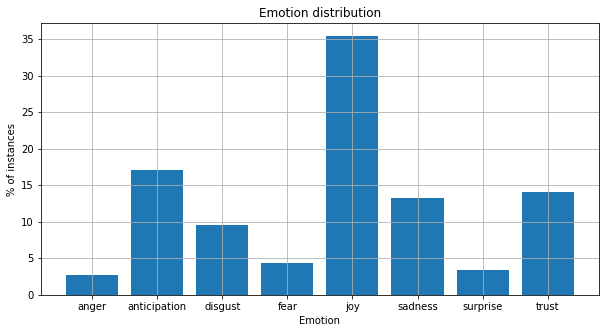

In [23]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# the histogram of the data
labels = train['emotion'].unique()
post_total = len(train)
df1 = train.groupby(['emotion']).count()['text']
df1 = df1.apply(lambda x: round(x*100/post_total,3))

#plot
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(df1.index,df1.values)

#arrange
plt.ylabel('% of instances')
plt.xlabel('Emotion')
plt.title('Emotion distribution')
plt.grid(True)
plt.show()

We can see that some labels have more number of tweets than others. The plot show "joy" has the highest propotion, on the other hand, "anger" is the lowest.

---

# Model 1 - Naive Bayes Classification using BOW

## 1. Feature engineering

## Sampling

As the original training data is quite huge (about 1,455,563 rows). With limited computational resources and to reduce the computational time, we will sampling some data to use.

In [24]:
# sampling 500,000 rows

sam = train.sample(n=500000, random_state=1)

In [25]:
sam.shape

(500000, 3)

In order to easily compare whether the sampling is a good representative of our dataset. we will plot a bar chart of original dataset compared side-by-side to the sample one to show how the distribution of them. 

In [26]:
# create s1 and s2. Then, combine them into s_plot

s1 = train.emotion.value_counts()
s2 = sam.emotion.value_counts()
s_plot = pd.concat([s1, s2], axis=1).sort_index(ascending=True)

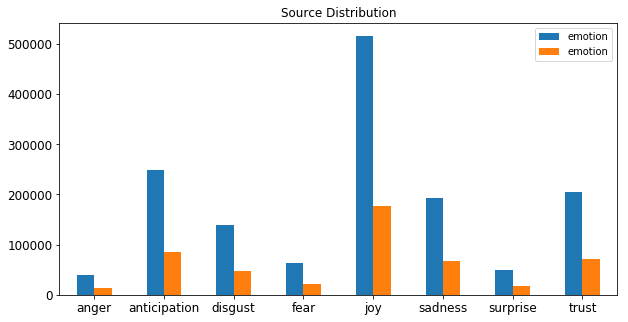

In [27]:
# plot bar chart for s_plot

s_plot.plot(kind = 'bar',
          title = 'Source Distribution',
          rot = 0, fontsize = 12, figsize = (10,5))

The bar chart above shows that the distribution of the emotion (label) column from original data (blue color) and sampling data (orange color) are very similar. Thus the sampling could be good enough to represent of our dataset.

## Feature creation :  Bag of Words
We will sampling the data first and then using Bag of Words to create our features for training

In [28]:
# split data into training and testing set

from sklearn.model_selection import train_test_split

X = sam['text']
y = sam['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [29]:
# see the shape of the data

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (400000,)
y_train (400000,)
X_test (100000,)
y_test (100000,)


In [30]:
# check first few rows of X_train 

X_train.head()

1106452    Se la mia Morte Brami.Referenced in 'True Stor...
61793      Shoulders where you at? 😭 #imgettingtiny <LH> ...
477207                 @Gweilouk I’d just fire them all <LH>
1308270                                     <LH> 4 Law vegas
487957     @hotelsdotcom I sure hope so! Fingers are cros...
Name: text, dtype: object

In [31]:
# check first few rows of y_train set

y_train.head()

1106452         disgust
61793           disgust
477207          sadness
1308270    anticipation
487957            trust
Name: emotion, dtype: object

Next, using `nltk` as tokenizer and using scikit-learn `CountVectorizer` to perform word frequency and term-document matrix, then use them as features to train a model. (in order to avoid the curse of dimensionality, we will choose top 500 words by frequency used)

In [32]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# create 500 features from the top-frequency 
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# learn vocabulary from train data
BOW_500.fit(X_train)

/home/charkkri/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


CountVectorizer(max_features=500,
                tokenizer=<function word_tokenize at 0x7fb37c4f97a0>)

In [33]:
# transform our tweet text into term-document matrix

X_train = BOW_500.transform(X_train)
X_test = BOW_500.transform(X_test)

In [34]:
# see the shape

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (400000, 500)
y_train (400000,)
X_test (100000, 500)
y_test (100000,)


In [35]:
# observe some feature names

feature_names_500 = BOW_500.get_feature_names()
feature_names_500[::50][0:10]

['!',
 'always',
 'care',
 'fifthharmony',
 'he',
 'lot',
 'nothing',
 'run',
 'them',
 'week']

In [36]:
"😂" in feature_names_500

True

Next,let's see the top-frequency word, by sorting them according to the frequency and query to show the sorted terms as below steps

In [37]:
# count frequency for each term

term_freq = []
for i in range(0,X_train.shape[1]):
    term_freq.append(sum(X_train[:,i].toarray()))

In [38]:
term_freq = np.asarray(X_train.sum(axis=0))[0]

In [39]:
# sort and show top 10

s_freq = pd.Series(data=term_freq, index=feature_names_500)
s_sort = s_freq.sort_values(ascending=False)
s_sort[:10]

lh     511228
>      511225
<      511225
#      462669
@      227465
.      211371
the    152727
!      145650
to     126076
i      125406
dtype: int64

We can also use wordcloud to visualize the terms by using below code

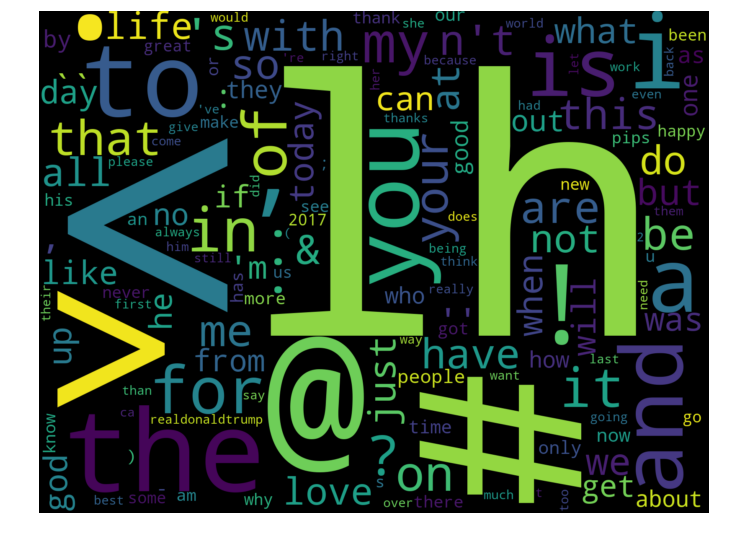

In [40]:
# create wordcloud
# you may need to install wordcloud by running next line
# !pip install wordcloud

df_wc = pd.DataFrame(list(zip(feature_names_500, term_freq)), 
               columns =['term', 'frequency'])

# plotb
plotwc = dict(zip(feature_names_500, df_wc['frequency'].tolist()))

from wordcloud import WordCloud

wordcloud = WordCloud(width=1600, height=1200, max_words=150, 
                      background_color="black").generate_from_frequencies(plotwc)

plt.figure(1,figsize=(12,12))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Since we did not filter out the stop words and punctuation marks, so the top-frequency words shown are some of them, which do not give us much insigntful. We may choose to apply some method to handle this issue in the future, like delete stop word, delete punctuation mark, or lemmatization.

---

## 2. Model 
We will use Naive Bayes Classification in this model

In [41]:
# use Naive Bayes classifier from sklearn

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

#Training
clf = clf.fit(X_train, y_train)

# predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

---

## 3. Results Evaluation

In [42]:
## accuracy

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.42
testing accuracy: 0.42


In [43]:
## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.16      0.12      0.14      2722
anticipation       0.45      0.43      0.44     17302
     disgust       0.29      0.31      0.30      9495
        fear       0.19      0.13      0.16      4432
         joy       0.49      0.63      0.55     35445
     sadness       0.38      0.37      0.37     13290
    surprise       0.43      0.11      0.18      3331
       trust       0.35      0.21      0.26     13983

    accuracy                           0.42    100000
   macro avg       0.34      0.29      0.30    100000
weighted avg       0.41      0.42      0.40    100000



---

## 4. Submit to Kaggle

In [44]:
# copy testing dataframe

test_BOW = test['text']
test_BOW.shape

(411972,)

In [45]:
# convert tweet text into term-document matrix

test_BOW = BOW_500.transform(test_BOW)

In [46]:
# check shape of term-document matrix
test_BOW

<411972x500 sparse matrix of type '<class 'numpy.int64'>'
	with 6269382 stored elements in Compressed Sparse Row format>

In [47]:
# predict using the trained model from previous section

pred_result = clf.predict(test_BOW)

In [48]:
# display some prediction result

pred_result

array(['anticipation', 'anticipation', 'disgust', ..., 'joy', 'joy',
       'anger'], dtype='<U12')

In [49]:
# create data frame for submission, containg only two columns, "tweet_id" and "emotion"

submission = pd.DataFrame({'id':test['tweet_id'],'emotion':pred_result})
submission.head()

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,disgust
30,0x2939d5,anticipation
33,0x26289a,anticipation


In [50]:
# check the shape

submission.shape

(411972, 2)

In [51]:
# export file in csv format
# create folder "result" located in folder "kaggle" to store the exported file

path = 'kaggle/result/'
filename = 'NB_BOW500.csv'
submission.to_csv(path+filename, index=False)
print('Saved file: ' + filename)

Saved file: NB_BOW500.csv


## Comment:
As we can see the accuracy when on the evaluation part is 0.42, however, when making submission on Kaggle, the accuracy is only 0.34026.


---

# Model 2 - Naive Bayes Classification using TF-IDF

## 1. Feature engineering

## Sampling

We use the same sample as processed in model 1, which is 500,000 rows of data.

## Feature creation :  TF-IDF

In [52]:
# split data into training and testing set

from sklearn.model_selection import train_test_split

X = sam['text']
y = sam['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [53]:
# see the shape of the data

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (400000,)
y_train (400000,)
X_test (100000,)
y_test (100000,)


In [54]:
# check first few rows of X_train 

X_train.head()

1106452    Se la mia Morte Brami.Referenced in 'True Stor...
61793      Shoulders where you at? 😭 #imgettingtiny <LH> ...
477207                 @Gweilouk I’d just fire them all <LH>
1308270                                     <LH> 4 Law vegas
487957     @hotelsdotcom I sure hope so! Fingers are cros...
Name: text, dtype: object

In [55]:
# check first few rows of y_train set

y_train.head()

1106452         disgust
61793           disgust
477207          sadness
1308270    anticipation
487957            trust
Name: emotion, dtype: object

Next, using `nltk` as tokenizer and using scikit-learn `TfidfVectorizer` to perform word frequency and term-document matrix, then use them as features to train a model. (in order to avoid the curse of dimensionality, we will choose top 500 words by frequency used)

In [56]:
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer


# create 500 features from the top-frequency 
tf500 = TfidfVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# learn vocabulary from train data
tf500.fit(X_train)

# transform our tweet text into term-document matrix
X_train = tf500.transform(X_train)
X_test = tf500.transform(X_test)

/home/charkkri/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


---

## 2. Model 
We will use Naive Bayes Classification in this model

In [57]:
# use Naive Bayes classifier from sklearn

from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()

#Training
clf = clf.fit(X_train, y_train)

# predict
y_train_pred = clf.predict(X_train)
y_test_pred = clf.predict(X_test)

---

## 3. Results Evaluation

In [58]:
## accuracy

from sklearn.metrics import accuracy_score

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))

training accuracy: 0.44
testing accuracy: 0.44


In [59]:
## precision, recall, f1-score

from sklearn.metrics import classification_report

print(classification_report(y_true=y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

       anger       0.93      0.05      0.09      2722
anticipation       0.60      0.29      0.39     17302
     disgust       0.57      0.10      0.16      9495
        fear       0.71      0.01      0.02      4432
         joy       0.40      0.94      0.57     35445
     sadness       0.52      0.26      0.34     13290
    surprise       0.94      0.07      0.12      3331
       trust       0.71      0.04      0.07     13983

    accuracy                           0.44    100000
   macro avg       0.67      0.22      0.22    100000
weighted avg       0.56      0.44      0.35    100000



---

## 4. Submit to Kaggle

In [60]:
# copy testing dataframe

test_tf = test['text']
test_tf.shape

(411972,)

In [61]:
# convert tweet text into term-document matrix

test_tf = tf500.transform(test_tf)

In [62]:
# predict using the trained model from previous section

pred_result = clf.predict(test_tf)

In [63]:
# display some prediction result

pred_result

array(['joy', 'anticipation', 'sadness', ..., 'joy', 'joy', 'sadness'],
      dtype='<U12')

In [64]:
# create data frame for submission, containg only two columns, "tweet_id" and "emotion"

submission = pd.DataFrame({'id':test['tweet_id'],'emotion':pred_result})
submission.head()

,id,emotion
2,0x28b412,joy
4,0x2de201,anticipation
9,0x218443,sadness
30,0x2939d5,joy
33,0x26289a,anticipation


In [65]:
# check the shape

submission.shape

(411972, 2)

In [66]:
# export file in csv format
# create folder "result" located in folder "kaggle" to store the exported file

path = 'kaggle/result/'
filename = 'NB_tf500.csv'
submission.to_csv(path+filename, index=False)
print('Saved file: ' + filename)

Saved file: NB_tf500.csv


## Comment:
As we can see the accuracy when using TF-IDF on the evaluation part is 0.44, this is very close to when using BOW which is 0.42. When making prediction and submission on Kaggle, the accuracy of using Naive Bayse with TF-IDF is only 0.34205 which is not a good improvment compare to using BOW.


---

# Model 3 - Deep Learning

## 1. Feature engineering

## Sampling

We use the same sample as processed in model 1, which is 500,000 rows of data.

## Feature creation :  BOW

In [67]:
# split data into training and testing set

from sklearn.model_selection import train_test_split

X = sam['text']
y = sam['emotion']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1)

In [68]:
# see the shape of the data

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (400000,)
y_train (400000,)
X_test (100000,)
y_test (100000,)


In [69]:
# check first few rows of X_train 

X_train.head()

1106452    Se la mia Morte Brami.Referenced in 'True Stor...
61793      Shoulders where you at? 😭 #imgettingtiny <LH> ...
477207                 @Gweilouk I’d just fire them all <LH>
1308270                                     <LH> 4 Law vegas
487957     @hotelsdotcom I sure hope so! Fingers are cros...
Name: text, dtype: object

In [70]:
# check first few rows of y_train set

y_train.head()

1106452         disgust
61793           disgust
477207          sadness
1308270    anticipation
487957            trust
Name: emotion, dtype: object

Next, using `nltk` as tokenizer and using scikit-learn `CountVectorizer` to perform word frequency and term-document matrix, then use them as features to train a model. (in order to avoid the curse of dimensionality, we will choose top 500 words by frequency used)

In [71]:
import nltk
from sklearn.feature_extraction.text import CountVectorizer

# create 500 features from the top-frequency 
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize) 

# learn vocabulary from train data
BOW_500.fit(X_train)

# transform our tweet text into term-document matrix
X_train = BOW_500.transform(X_train)
X_test = BOW_500.transform(X_test)

/home/charkkri/anaconda3/lib/python3.7/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


In [72]:
## deal with label (convert string label to one-hot)

import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

print('\ny_train.shape: ', y_train.shape)
print('y_test.shape: ', y_test.shape)


y_train.shape:  (400000, 8)
y_test.shape:  (100000, 8)


In [73]:
# check shape of input and output

input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

input_shape:  500
output_shape:  8


---

## 2. Model 
Use Deep Learning as our TA (Teacher Assistants) introduce in the lab2.

In [74]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()
Model: "functional_1"


Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 500)]             0         
_________________________________________________________________
dense (Dense)                (None, 64)                32064     
_________________________________________________________________
re_lu (ReLU)                 (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
re_lu_1 (ReLU)               (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 520       
_________________________________________________________________
softmax (Softmax)            (None, 8)                

In [75]:
from keras.callbacks import CSVLogger

# training setting
epochs = 6
batch_size = 32

# training!
history = model.fit(X_train, y_train, 
                    epochs=epochs, 
                    batch_size=batch_size, 
                    validation_data = (X_test, y_test))
print('training finish')

Epoch 1/6
12500/12500 [==============================] - 32s 3ms/step - loss: 1.4599 - accuracy: 0.4683 - val_loss: 1.4158 - val_accuracy: 0.4857
Epoch 2/6
12500/12500 [==============================] - 31s 2ms/step - loss: 1.3968 - accuracy: 0.4903 - val_loss: 1.4053 - val_accuracy: 0.4890
Epoch 3/6
12500/12500 [==============================] - 32s 3ms/step - loss: 1.3770 - accuracy: 0.4973 - val_loss: 1.4003 - val_accuracy: 0.4909
Epoch 4/6
12500/12500 [==============================] - 31s 3ms/step - loss: 1.3645 - accuracy: 0.5018 - val_loss: 1.3991 - val_accuracy: 0.4902
Epoch 5/6
12500/12500 [==============================] - 32s 3ms/step - loss: 1.3554 - accuracy: 0.5051 - val_loss: 1.3966 - val_accuracy: 0.4925
Epoch 6/6
12500/12500 [==============================] - 31s 2ms/step - loss: 1.3484 - accuracy: 0.5069 - val_loss: 1.3981 - val_accuracy: 0.4929
training finish


---

## 3. Results Evaluation

In [76]:
# predict on testing set

pred_result = model.predict(X_test, batch_size=128)

In [77]:
# decode the label back to string

pred_result = label_decode(label_encoder, pred_result)

In [78]:
# See the accuracy

from sklearn.metrics import accuracy_score
print('testing accuracy: {}'.format(round(accuracy_score(label_decode(label_encoder, y_test), pred_result), 2)))

testing accuracy: 0.49


---

## 4. Submit to Kaggle

In [79]:
# copy testing dataframe

test_dl = test['text']
test_dl.shape

(411972,)

In [80]:
# convert tweet text into term-document matrix

test_dl = BOW_500.transform(test_dl)

In [81]:
# predict using the trained model from previous section

pred_result = model.predict(test_dl, batch_size=128)

In [82]:
# decode label back to string

pred_result = label_decode(label_encoder, pred_result)

In [83]:
# display some prediction result

pred_result

array(['anticipation', 'anticipation', 'sadness', ..., 'disgust', 'joy',
       'sadness'], dtype=object)

In [84]:
# create data frame for submission, containg only two columns, "tweet_id" and "emotion"

submission = pd.DataFrame({'id':test['tweet_id'],'emotion':pred_result})
submission.head()

,id,emotion
2,0x28b412,anticipation
4,0x2de201,anticipation
9,0x218443,sadness
30,0x2939d5,joy
33,0x26289a,anticipation


In [85]:
# check the shape

submission.shape

(411972, 2)

In [86]:
# export file in csv format
# create folder "result" located in folder "kaggle" to store the exported file

path = 'kaggle/result/'
filename = 'DL_BOW500.csv'
submission.to_csv(path+filename, index=False)
print('Saved file: ' + filename)

Saved file: DL_BOW500.csv


## Comment:

The accuracy show when testing the model here is 0.49. But the accuracy on Kaggle website when making submission is 0.39685. We can see some improvement compare to using Naive Bayse.  

**Remark**  
- I choose epoch equal to six is because I tried training the model upto 25 epochs and it tends to overfit when using more than 6 epochs.
- I tried using TF-IDF with 500 features, instead of BOW. But the results on Kaggle is very similar to using BOW.
- I tried using more sample at 1,000,000 rows. And the result on Kaggle is 0.39073, very close to when using the sample of 500,000 rows. It seems number of sample does not help increase the accuracy at this point.

---

# Model 4 - BERT (Bidirectional Encoder Representations from Transformers)
As TA meantioned during the lab session, Deep Learning and many new techniques like using Tensorflow, Keras takes more time to learn (it could be a semester course). Most of the code in this part are modified from many online sources, but mainly from below website. 
- Tensorflow documentation : https://www.tensorflow.org/tutorials/text/classify_text_with_bert
- Keras documentation : https://keras.io/examples/nlp/text_extraction_with_bert/
- Google Developers : https://developers.google.com/machine-learning/guides/text-classification
  
Please download BERT Tokenization module and place in the same folder with this notebook. The file can be downloaded from Google Research GitHub : https://github.com/google-research/bert/blob/master/tokenization.py


## 1. Feature engineering

## Sampling

As the training time in this model take longer than previous models, so we will start with the sample size of 300,000 rows.

In [1]:
!pip install sentencepiece
!pip install bert-tensorflow

In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow_hub as hub
import logging

logging.basicConfig(level=logging.INFO)

I choose to restart notebook to clear the memory first, because running many cells from previous sections consume a lot of memory. Then I have to re-load the data again

In [3]:
# Load data from pickle file that we save before

train = pd.read_pickle('kaggle/train.pkl')
test = pd.read_pickle('kaggle/test.pkl')

In [4]:
# sampling 300,000 rows

train = train.sample(n=300000, random_state=1)

In [5]:
train_labels = train['emotion']

In [6]:
## deal with label (convert string to one-hot encoder)

import keras
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
label_encoder.fit(train_labels)


def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

train_labels = label_encode(label_encoder, train_labels)

In [7]:
# check label output shape

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

output_shape:  8


## Feature creation

In [8]:
# download the saved model

import tokenization
module_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/2"
bert_layer = hub.KerasLayer(module_url, trainable=True)

INFO:absl:Using /tmp/tfhub_modules to cache modules.
INFO:absl:Downloading TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'.
INFO:absl:Downloaded https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3, Total size: 434.04MB
INFO:absl:Downloaded TF-Hub Module 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/3'.


In [9]:
# function to processing and tokenize text

vocab_file = bert_layer.resolved_object.vocab_file.asset_path.numpy()
do_lower_case = bert_layer.resolved_object.do_lower_case.numpy()
tokenizer = tokenization.FullTokenizer(vocab_file, do_lower_case)

def bert_encode(texts, tokenizer, max_len=512):
    all_tokens = []
    all_masks = []
    all_segments = []
    
    for text in texts:
        text = tokenizer.tokenize(text)
            
        text = text[:max_len-2]
        input_sequence = ["[CLS]"] + text + ["[SEP]"]
        pad_len = max_len - len(input_sequence)
        
        tokens = tokenizer.convert_tokens_to_ids(input_sequence) + [0] * pad_len
        pad_masks = [1] * len(input_sequence) + [0] * pad_len
        segment_ids = [0] * max_len
        
        all_tokens.append(tokens)
        all_masks.append(pad_masks)
        all_segments.append(segment_ids)
    
    return np.array(all_tokens), np.array(all_masks), np.array(all_segments)

Many sources mentioned that pre-processing data by ourself usually get lower accuracy that using **tokenizer** from Google Research for BERT. So I will skip the cleaning data and let the function in `tokenization.py` we just imported above do this for us. The module runs basic tokenization (punctuation splitting, lower casing, white-space splitting, etc.)

In [10]:
# Tokenize text column from train and test dataset
# use max_len = 124 as it is the maximum characters can be used in a tweet

max_len = 124
train_input = bert_encode(train.text.values, tokenizer, max_len=max_len)
test_input = bert_encode(test.text.values, tokenizer, max_len=max_len)

---

## 2. Model 


## Please note:
As the model training takes very long time (almost 4 hours with 300,000 rows of sample on Tesla T4 GPU), while writing this report, it is not possible for me to run the model and show the result step-by-step. So, start from this section I will provide the code with some comments, instead of running each cell like the previous ones.

During the competition, I directly ran the model (python script) on terminal of virtual machine (VM) of Google Cloud Platform, the result displayed from VM terminal during the running process was gone after closing the application. (I could not run Jupyter Notebook on VM longer than 8 hours, because it automatically disconnect from the jupyterlab server.

In [11]:
# Fucntion to build model

def build_model(bert_layer, max_len=512):
    input_word_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_word_ids")
    input_mask = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="input_mask")
    segment_ids = tf.keras.Input(shape=(max_len,), dtype=tf.int32, name="segment_ids")

    pooled_output, sequence_output = bert_layer([input_word_ids, input_mask, segment_ids])
    clf_output = sequence_output[:, 0, :]
    net = tf.keras.layers.Dense(64, activation='relu')(clf_output)
    net = tf.keras.layers.Dropout(0.2)(net)
    net = tf.keras.layers.Dense(32, activation='relu')(net)
    net = tf.keras.layers.Dropout(0.2)(net)
    out = tf.keras.layers.Dense(8, activation='softmax')(net)
    
    model = tf.keras.models.Model(inputs=[input_word_ids, input_mask, segment_ids], outputs=out)
    model.compile(tf.keras.optimizers.Adam(lr=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])
    
    return model

In [12]:
model = build_model(bert_layer, max_len=max_len)
model.summary()

Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_word_ids (InputLayer)     [(None, 124)]        0                                            
__________________________________________________________________________________________________
input_mask (InputLayer)         [(None, 124)]        0                                            
__________________________________________________________________________________________________
segment_ids (InputLayer)        [(None, 124)]        0                                            
__________________________________________________________________________________________________
keras_layer (KerasLayer)        [(None, 768), (None, 109482241   input_word_ids[0][0]             
                                                                 input_mask[0][0]      

In [ ]:
# train the model
earlystopping = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

history = model.fit(
    train_input, train_labels, 
    validation_split=0.2,
    epochs=3,
    callbacks=[earlystopping],
    batch_size=32,
    verbose=1

---

## 4. Submit to Kaggle

In [ ]:
# predict using the trained model from previous section

test_pred = model.predict(test_input)

In [ ]:
# decode label back to string

pred_result = label_decode(label_encoder, test_pred)

In [ ]:
# display some prediction results

pred_result

In [ ]:
# create data frame for submission, containg only two columns, "tweet_id" and "emotion"

submission = pd.DataFrame({'id':test['tweet_id'],'emotion':pred_result})
submission.head()

In [ ]:
# check the shape

submission.shape

In [ ]:
# export file in csv format
# create folder "result" located in folder "kaggle" to store the exported file

path = 'kaggle/result/'
filename = 'BERT_sample300k.csv'
submission.to_csv(path+filename, index=False)
print('Saved file: ' + filename)

## Comment:

- when training with 300,000 rows of sample with 3 epochs, the training accuracy is 0.6400 (validation accuracy is 0.6203). But the accuracy when making submission on Kaggle is 0.50592.  

- I attemped training with 300,000 rows of sample with 5 epochs, the training accuracy is 0.7144 (validation accuracy is 0.6274). But the accuracy when making submission on Kaggle is 0.50774.

- from above two cases, we can see that the possibility of overfitting become larger. And due to the limited computation resources, I choose to experiment furthur by training the model with 3 epochs only.

- I ran another training with 600,000 rows of sample with 3 epochs, the training accuracy is 0.6614 (validation accuracy is 0.6422). But the accuracy when making submission on Kaggle is 0.52719. It seems that increasing sample size helps in accuracy improving.

- Again with all the limitation of time and resources, I attemped last training with 1,200,000 rows of sample with 3 epochs (without tuning other parameter). And the result of the accuracy when making submission on Kaggle is 0.54301, a little bit improve from previous.




---

# Conclusion  

From above experiment, we may conclude the observation of three models as follow.  
- In term of accuaracy when making submission on Kaggle, BERT perform the best, followed by Deep Learning and Naive Bayse.
- As usual for all models, longer training time (more epochs) tends to be easy to overfit.

**Model with Naive Bayse Classifier**
- there is no much different in accuracy when using two different methods (between BOW and TF-IDF) in the feature engineering process.  

**Model with Deep Learning**
- Similar to Naive Bayse, there is no much different in accuracy when using two different methods (between BOW and TF-IDF) in the feature engineering process.
- Increasing the sample size does not help in increasing accuracy.   

**Model with BERT**
- Increasing the sample size seems influence the accuracy, the bigger the sample size, the higher the accuracy.  
- BERT gives the highest accuracy among those model, however the training time is much longer which cost more iin both time and money (electrictity bill, Virtual Machine rent)
- If we have enough background knowledge and do more tuning when experiment with BERT, we may have better accuracy.



---